In [2]:
# Import necessary libraries
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from torch.utils.data import DataLoader, TensorDataset

# Load and preprocess the data
data = pd.read_csv('/kaggle/input/digit-recognizer/train.csv')

# Separate features and labels
X = data.iloc[:, 1:].values  # pixel values
Y = data.iloc[:, 0].values   # labels (0-9)

# Normalize pixel values to be between 0 and 1
X = X / 255.0

# Convert data to torch tensors
X = torch.tensor(X, dtype=torch.float32)
Y = torch.tensor(Y, dtype=torch.long)

# Split into training and development sets
X_train, X_dev, Y_train, Y_dev = train_test_split(X, Y, test_size=0.2, random_state=42)

# Create DataLoader for batching
train_data = TensorDataset(X_train, Y_train)
train_loader = DataLoader(train_data, batch_size=32, shuffle=True)

dev_data = TensorDataset(X_dev, Y_dev)
dev_loader = DataLoader(dev_data, batch_size=32, shuffle=False)

In [3]:
# Custom initializers
def custom_initializer_1(layer):
    if isinstance(layer, nn.Linear):
        nn.init.uniform_(layer.weight, a=-0.5, b=0.5)
        if layer.bias is not None:
            nn.init.uniform_(layer.bias, a=-0.5, b=0.5)

def custom_initializer_2(layer):
    if isinstance(layer, nn.Linear):
        nn.init.normal_(layer.weight, mean=0, std=4 / (layer.weight.size(0) + layer.weight.size(1)))
        if layer.bias is not None:
            nn.init.normal_(layer.bias, mean=0, std=0.1)

# Build a shallow neural network model
class SimpleNN(nn.Module):
    def __init__(self, initializer):
        super(SimpleNN, self).__init__()
        self.fc1 = nn.Linear(784, 10)
        self.fc2 = nn.Linear(10, 10)
        self.apply(initializer)  # Apply custom initializer
    
    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.softmax(self.fc2(x), dim=1)
        return x

In [4]:
# Training loop
def train_model(model, train_loader, dev_loader, epochs=50):
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=0.001)
    
    train_acc_history = []
    dev_acc_history = []
    
    for epoch in range(epochs):
        model.train()
        correct, total = 0, 0
        running_loss = 0.0
        
        for batch_x, batch_y in train_loader:
            optimizer.zero_grad()
            outputs = model(batch_x)
            loss = criterion(outputs, batch_y)
            loss.backward()
            optimizer.step()
            
            # Track accuracy
            _, predicted = torch.max(outputs, 1)
            total += batch_y.size(0)
            correct += (predicted == batch_y).sum().item()
            running_loss += loss.item()

        train_acc = 100 * correct / total
        train_acc_history.append(train_acc)
        
        # Evaluate on development set
        model.eval()
        dev_correct, dev_total = 0, 0
        with torch.no_grad():
            for dev_x, dev_y in dev_loader:
                dev_outputs = model(dev_x)
                _, dev_predicted = torch.max(dev_outputs, 1)
                dev_total += dev_y.size(0)
                dev_correct += (dev_predicted == dev_y).sum().item()
        
        dev_acc = 100 * dev_correct / dev_total
        dev_acc_history.append(dev_acc)
        
        print(f'Epoch {epoch+1}/{epochs}, Loss: {running_loss/len(train_loader):.4f}, Train Accuracy: {train_acc:.2f}%, Dev Accuracy: {dev_acc:.2f}%')
    
    return train_acc_history, dev_acc_history

# Plotting function for accuracy and loss
def plot_history(train_acc, dev_acc, name):
    plt.plot(train_acc, label='Train Accuracy')
    plt.plot(dev_acc, label='Dev Accuracy')
    plt.title(f'Model Accuracy - {name}')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()

Training model with Initializer 1 (Uniform)
Epoch 1/50, Loss: 1.8437, Train Accuracy: 64.16%, Dev Accuracy: 78.98%
Epoch 2/50, Loss: 1.6729, Train Accuracy: 80.25%, Dev Accuracy: 81.15%
Epoch 3/50, Loss: 1.6523, Train Accuracy: 81.73%, Dev Accuracy: 81.88%
Epoch 4/50, Loss: 1.6424, Train Accuracy: 82.57%, Dev Accuracy: 82.43%
Epoch 5/50, Loss: 1.6365, Train Accuracy: 83.04%, Dev Accuracy: 82.62%
Epoch 6/50, Loss: 1.6320, Train Accuracy: 83.50%, Dev Accuracy: 82.63%
Epoch 7/50, Loss: 1.6286, Train Accuracy: 83.71%, Dev Accuracy: 82.88%
Epoch 8/50, Loss: 1.6259, Train Accuracy: 83.93%, Dev Accuracy: 82.96%
Epoch 9/50, Loss: 1.6233, Train Accuracy: 84.21%, Dev Accuracy: 82.82%
Epoch 10/50, Loss: 1.6212, Train Accuracy: 84.42%, Dev Accuracy: 83.12%
Epoch 11/50, Loss: 1.6196, Train Accuracy: 84.47%, Dev Accuracy: 83.14%
Epoch 12/50, Loss: 1.6178, Train Accuracy: 84.64%, Dev Accuracy: 83.14%
Epoch 13/50, Loss: 1.6163, Train Accuracy: 84.84%, Dev Accuracy: 83.46%
Epoch 14/50, Loss: 1.6148, Tr

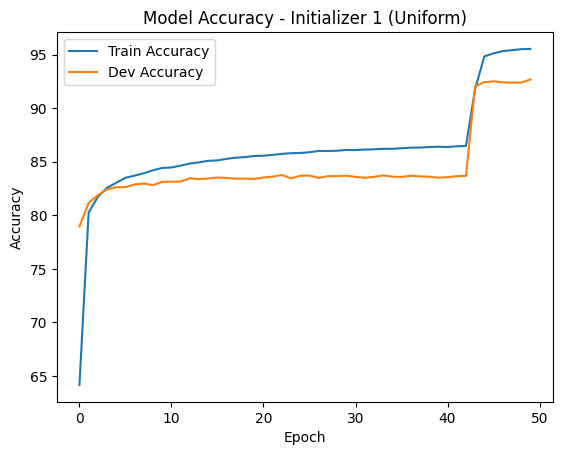

Training model with Initializer 2 (Normal)
Epoch 1/50, Loss: 1.8215, Train Accuracy: 68.06%, Dev Accuracy: 81.81%
Epoch 2/50, Loss: 1.6463, Train Accuracy: 83.12%, Dev Accuracy: 82.68%
Epoch 3/50, Loss: 1.6308, Train Accuracy: 84.02%, Dev Accuracy: 83.39%
Epoch 4/50, Loss: 1.6238, Train Accuracy: 84.46%, Dev Accuracy: 83.55%
Epoch 5/50, Loss: 1.6193, Train Accuracy: 84.82%, Dev Accuracy: 83.63%
Epoch 6/50, Loss: 1.6159, Train Accuracy: 85.08%, Dev Accuracy: 83.90%
Epoch 7/50, Loss: 1.6134, Train Accuracy: 85.33%, Dev Accuracy: 84.02%
Epoch 8/50, Loss: 1.6115, Train Accuracy: 85.48%, Dev Accuracy: 84.01%
Epoch 9/50, Loss: 1.6099, Train Accuracy: 85.57%, Dev Accuracy: 83.76%
Epoch 10/50, Loss: 1.6083, Train Accuracy: 85.70%, Dev Accuracy: 83.96%
Epoch 11/50, Loss: 1.6071, Train Accuracy: 85.82%, Dev Accuracy: 83.82%
Epoch 12/50, Loss: 1.6063, Train Accuracy: 85.83%, Dev Accuracy: 83.93%
Epoch 13/50, Loss: 1.6048, Train Accuracy: 86.03%, Dev Accuracy: 83.85%
Epoch 14/50, Loss: 1.6046, Tra

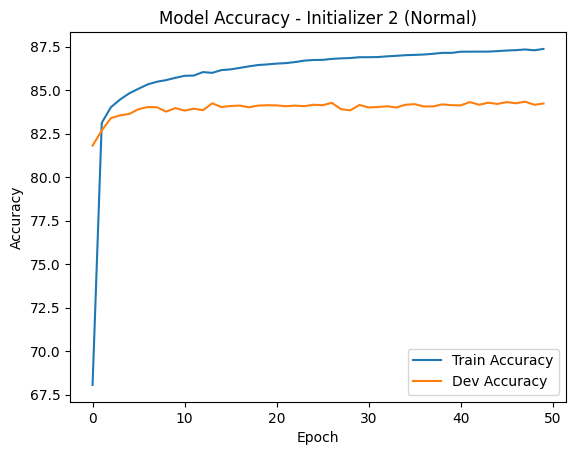

In [5]:
# Train and evaluate with both custom initializations
initializers = {'Initializer 1 (Uniform)': custom_initializer_1, 
                'Initializer 2 (Normal)': custom_initializer_2}

for name, initializer in initializers.items():
    print(f"Training model with {name}")
    
    # Build model with the current initializer
    model = SimpleNN(initializer)
    
    # Train the model
    train_acc, dev_acc = train_model(model, train_loader, dev_loader)
    
    # Plot accuracy
    plot_history(train_acc, dev_acc, name)

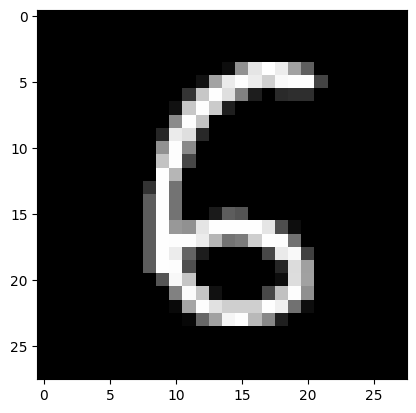

Prediction: 6, True Label: 6


In [6]:
# Predict a sample and visualize
index = 5  # Pick a sample index
current_image = X_dev[index].reshape(28, 28).numpy()  # Reshape from 784 to 28x28

# Display the image
plt.imshow(current_image, cmap='gray')
plt.show()

# Make a prediction
model.eval()
sample = X_dev[index].reshape(1, 784)
prediction = torch.argmax(model(sample)).item()
true_label = Y_dev[index].item()

print(f"Prediction: {prediction}, True Label: {true_label}")